In [1]:
import torch as tr
import numpy as np
import matplotlib.pyplot as plt

In [73]:
fftLen = 2**24

In [76]:
%%timeit
data = np.uint8(np.random.normal(127,60,fftLen))

310 ms ± 994 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [77]:
%%timeit
data = np.uint8(np.random.normal(127,60,fftLen))
tensor = tr.tensor(data)
tensor.to('cuda')

315 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
dataSize = (fftLen * 8)/8e6 #MB 
transferTime = (.318 - .314) #sec
print('Transfer Rate 2^24 = ', dataSize/transferTime, 'MB/sec')

Transfer Rate 2^24 =  4194.303999999996 MB/sec


In [80]:
fftTransferRatio =(.409 - .315) / transferTime
print('2^24 pt fft, the fft to transfer time ratio is ', fftTransferRatio )

2^24 pt fft, the fft to transfer time ratio is  23.49999999999997


In [67]:
fftLen = 2**29

In [71]:
%%timeit
data = np.uint8(np.random.normal(127,60,fftLen))
tensor = tr.tensor(data)
tensor.to('cuda')
tr.fft.fft(tensor)

11.9 s ± 58.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
dataSize = (fftLen * 8)/8e6 #MB 
transferTime = (10.2 - 10) #sec
print('Transfer Rate 2^29 = ', dataSize/transferTime, 'MB/sec')

Transfer Rate 2^29 =  2684.3545600000093 MB/sec


In [79]:
%%timeit
data = np.uint8(np.random.normal(127,60,fftLen))
tensor = tr.tensor(data)
tensor.to('cuda')
tr.fft.fft(tensor)

409 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
fftTransferRatio = (11.9 - 10.2) / transferTime
print('2^29 pt fft, the fft to transfer time ratio is ', fftTransferRatio )

2^29 pt fft, the fft to transfer time ratio is  8.500000000000036


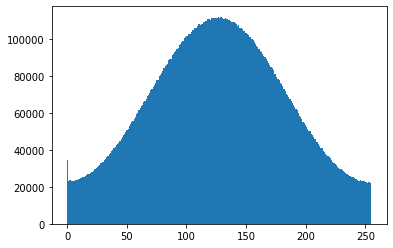

In [11]:
plt.hist(data, bins = 2**8);

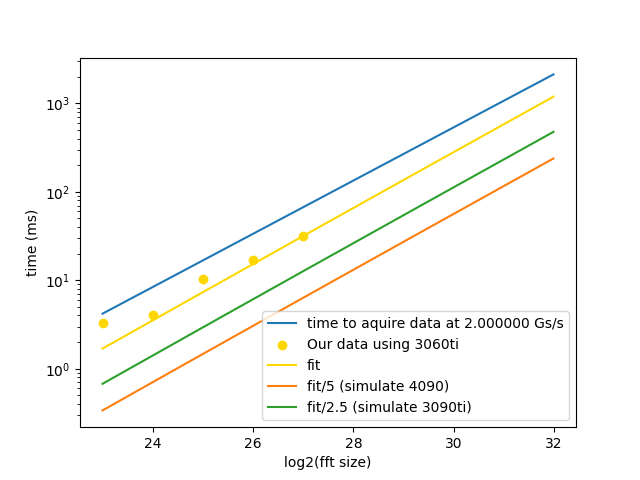

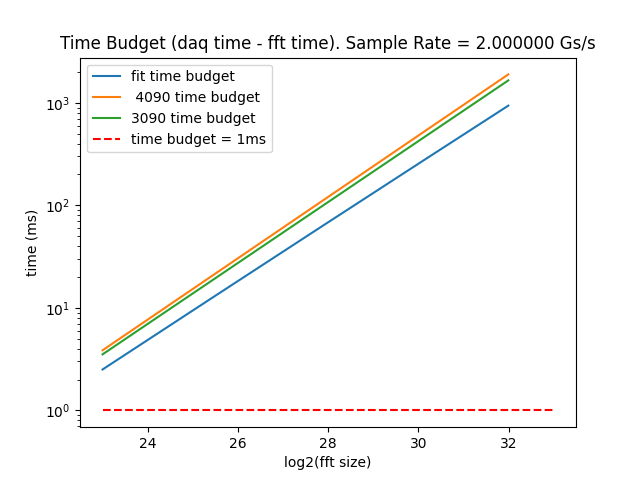

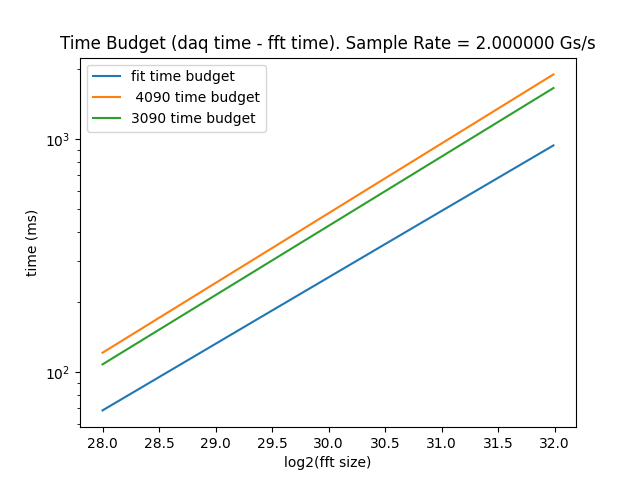

In [226]:
%matplotlib widget
def fftScale(logSizeFFT):
    return 31.7 * (2**logSizeFFT)/(2**27) * (logSizeFFT/27)

def daqTime(logSizeFFt, sampeRate):
    return (2**logSizeFFt) / (sampeRate/1000) #working in ms!
sampleRate = 2e9 #Hz
fftSize = [2**23, 2**24, 2**25, 2**26, 2**27]
fftTime = [3.25,4.09,10.21,16.78,31.7]
fftdxLog = np.arange(23, 32, .01)

plt.semilogy(fftdxLog, daqTime(fftdxLog, sampleRate), label = 'time to aquire data at %f Gs/s' % float(sampleRate/1e9))
plt.scatter(np.log2(fftSize), fftTime, label = 'Our data using 3060ti', color = 'gold')
plt.semilogy(fftdxLog, fftScale(fftdxLog), label = 'fit', color = 'gold')
plt.semilogy(fftdxLog, fftScale(fftdxLog)/5, label = 'fit/5 (simulate 4090)')
plt.semilogy(fftdxLog, fftScale(fftdxLog)/2.5, label = 'fit/2.5 (simulate 3090ti)')
plt.xlabel('log2(fft size)')
plt.ylabel('time (ms)')
plt.legend()


fftdxLog = np.arange(23, 32, .01)
plt.figure()
plt.title('Time Budget (daq time - fft time). Sample Rate = %f Gs/s'% float(sampleRate/1e9))
plt.semilogy(fftdxLog, (daqTime(fftdxLog, sampleRate) - fftScale(fftdxLog)), label = 'fit time budget')
plt.semilogy(fftdxLog, (daqTime(fftdxLog, sampleRate) - fftScale(fftdxLog)/5), label = ' 4090 time budget')
plt.semilogy(fftdxLog, (daqTime(fftdxLog, sampleRate) - fftScale(fftdxLog)/2.5), label = '3090 time budget')
plt.plot((min(fftdxLog), max(fftdxLog) + 1), (1,1), 'r--', label = 'time budget = 1ms')
plt.xlabel('log2(fft size)')
plt.ylabel('time (ms)')
plt.legend()

fftdxLog = np.arange(28, 32, .01)
plt.figure()
plt.title('Time Budget (daq time - fft time). Sample Rate = %f Gs/s'% float(sampleRate/1e9))
plt.semilogy(fftdxLog, (daqTime(fftdxLog, sampleRate) - fftScale(fftdxLog)), label = 'fit time budget')
plt.semilogy(fftdxLog, (daqTime(fftdxLog, sampleRate) - fftScale(fftdxLog)/5), label = ' 4090 time budget')
plt.semilogy(fftdxLog, (daqTime(fftdxLog, sampleRate) - fftScale(fftdxLog)/2.5), label = '3090 time budget')
#plt.plot((min(fftdxLog), max(fftdxLog) + 1), (1,1), 'r--', label = 'time budget = 1ms')
plt.xlabel('log2(fft size)')
plt.ylabel('time (ms)')
plt.legend()